# Pixel level analysis

In [3]:
import chronos as cr

## Estimate contamination

### get tpf and aperture mask

In [4]:
s = cr.ShortCadence(toiid=125.02)

Available sectors: [1, 2]
Using sector=1.


In [5]:
s.ticid

52368076

In [6]:
tpf, df = s.get_tpf()


Searching mast for TIC 52368076

2 tpf(s) found in sector(s) [1, 2]
Using data from sector 1 only


Applying data quality mask identified in Data Release Notes (sector 1):
t<1346|t>1350



In [7]:
tpf.hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   15991R x 11C   ['D', 'E', 'J', '121J', '121E', '121E', '121E', '121E', 'J', 'E', 'E']   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   ['J', 'I', 'I', 'E']   


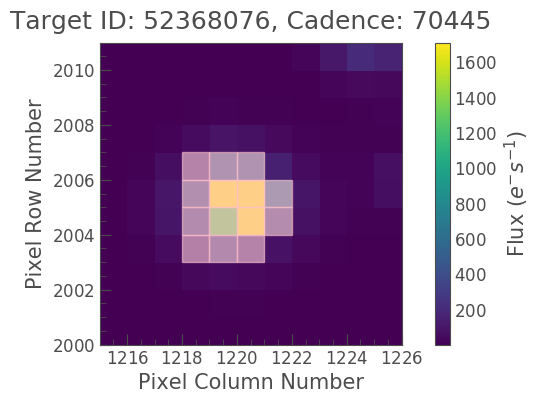

In [8]:
ax = tpf.plot(aperture_mask='pipeline');

### get nearby gaia sources

Querying Gaia DR2 catalog for 23.5934 -66.6763 within 60.0 arcsec.



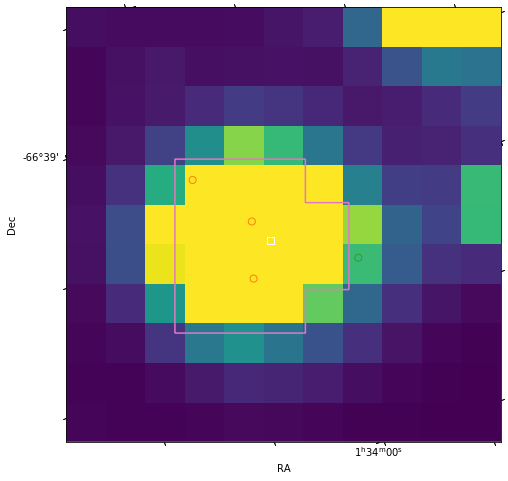

In [9]:
depth = s.toi_params['Depth (ppm)']/1e6
kmax = 1
gaia_sources = s.query_gaia_dr2_catalog(radius=60)
target_gaiaid = gaia_sources.iloc[0]['source_id']

cr.plot_gaia_sources_on_tpf(tpf, target_gaiaid=target_gaiaid, sap_mask='pipeline',
                            gaia_sources=gaia_sources, depth=depth, figsize=(8,8))

Querying Gaia DR2 catalog for 23.5934 -66.6763 within 60.0 arcsec.

Querying DSS2 Red (2.18 arcmin x 2.18 arcmin) archival image


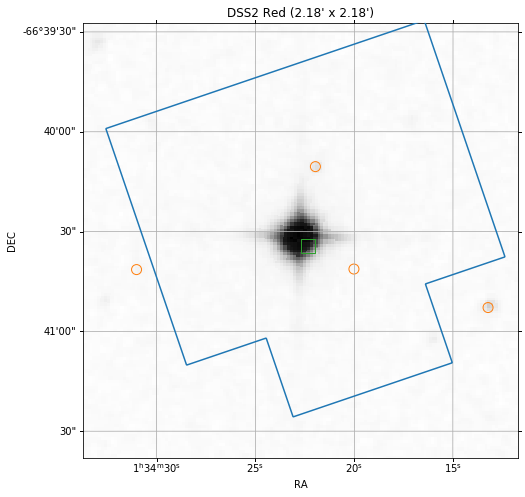

In [10]:
d = s.query_gaia_dr2_catalog(radius=60)
gaiaid = d.iloc[0]['source_id']
depth = s.toi_params['Depth (ppm)']/1e6
fig = cr.plot_gaia_sources_on_survey(tpf, target_gaiaid=gaiaid, sap_mask='pipeline', 
                                  depth=depth, gaia_sources=d, figsize=(8, 8), survey='DSS2 Red');

### compute contamination

In [17]:
cr.utils.SkyCoord?

In [19]:
fluxes = cr.compute_fluxes_within_mask(tpf, tpf.pipeline_mask, s.gaia_sources)
#flux ratio due to other stars
sum((fluxes/sum(fluxes))[1:]), sum(fluxes)-1

(0.0014358728840285682, 0.001437937579608084)

TIC provides contamination estimate for each target

In [11]:
tic_params = s.query_tic_catalog(return_nearest_xmatch=True)

Querying TIC catalog for 23.5934 -66.6763
            within 3.0 arcsec.



In [12]:
tic_params['contratio']

0.0008560611

In [13]:
#why such difference? is it due to varying number of stars from tic and gaia?
len(s.query_tic_catalog(radius=60)), len(s.query_gaia_dr2_catalog(radius=60))

Querying TIC catalog for 23.5934 -66.6763
            within 60.0 arcsec.

Querying Gaia DR2 catalog for 23.5934 -66.6763 within 60.0 arcsec.



(6, 5)

Is this similar to what is recorded in CDIPS fits header?

In [ ]:
gaiaid = s.query_gaia_dr2_catalog(return_nearest_xmatch=True)
cdips = cr.CDIPS(gaiaDR2id=s.gaiaid, sector=8, verbose=False)

In [ ]:
cdips.header0['TICCONT']